# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the dataset

In [2]:
df_mat = pd.read_csv('student-mat.csv')
df_por = pd.read_csv('student-por.csv')

# EDA - (1)

In [3]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df_mat.shape

(395, 33)

In [6]:
df_por.shape

(649, 33)

In [7]:
df_mat.dtypes, df_mat.describe

(school        object
 sex           object
 age            int64
 address       object
 famsize       object
 Pstatus       object
 Medu           int64
 Fedu           int64
 Mjob          object
 Fjob          object
 reason        object
 guardian      object
 traveltime     int64
 studytime      int64
 failures       int64
 schoolsup     object
 famsup        object
 paid          object
 activities    object
 nursery       object
 higher        object
 internet      object
 romantic      object
 famrel         int64
 freetime       int64
 goout          int64
 Dalc           int64
 Walc           int64
 health         int64
 absences       int64
 G1             int64
 G2             int64
 G3             int64
 dtype: object,
 <bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
 0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
 1       GP   F   17       U     GT3       T     1     1   at_ho

In [8]:
df_por.dtypes, df_por.describe

(school        object
 sex           object
 age            int64
 address       object
 famsize       object
 Pstatus       object
 Medu           int64
 Fedu           int64
 Mjob          object
 Fjob          object
 reason        object
 guardian      object
 traveltime     int64
 studytime      int64
 failures       int64
 schoolsup     object
 famsup        object
 paid          object
 activities    object
 nursery       object
 higher        object
 internet      object
 romantic      object
 famrel         int64
 freetime       int64
 goout          int64
 Dalc           int64
 Walc           int64
 health         int64
 absences       int64
 G1             int64
 G2             int64
 G3             int64
 dtype: object,
 <bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
 0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
 1       GP   F   17       U     GT3       T     1     1   at_ho

In [9]:
df_mat.age.value_counts() # class imbalance

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

In [10]:
df_por.age.value_counts() #class imbalance

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

### Due to imbalanced classes we will not be considering age class falling under 20, 21, 22.

In [20]:
df_mat_new = df_mat[~ ((df_mat['age'] == 20.0) | (df_mat['age'] == 21.0) | (df_mat['age'] == 22.0)) ]

In [21]:
df_por_new = df_por[~ ((df_por['age'] == 20.0) | (df_por['age'] == 21.0) | (df_por['age'] == 22.0)) ]

# New shape

In [29]:
df_mat_new.shape, df_por_new.shape

((390, 33), (640, 33))

# EDA - 2 (Graphs and Visualization)

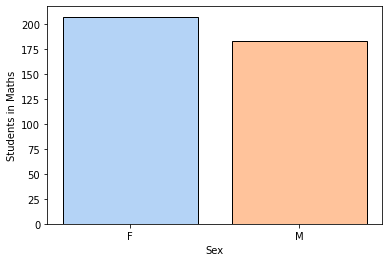

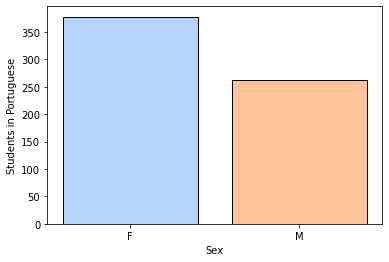

In [132]:
f1 = sns.histplot(data = df_mat_new,x = 'sex',hue='sex',alpha=.8, legend=False,palette='pastel',shrink=.8)
f1.set(xlabel='Sex', ylabel='Students in Maths')
plt.show(f1)

f2 = sns.histplot(data = df_por_new,x = 'sex',hue='sex',alpha=.8, legend=False,palette='pastel',shrink=.8)
f2.set(xlabel='Sex', ylabel='Students in Portuguese')
plt.show(f2)

## Correlation - Maths

Text(0.5, 1.0, 'Correlation Heatmap')

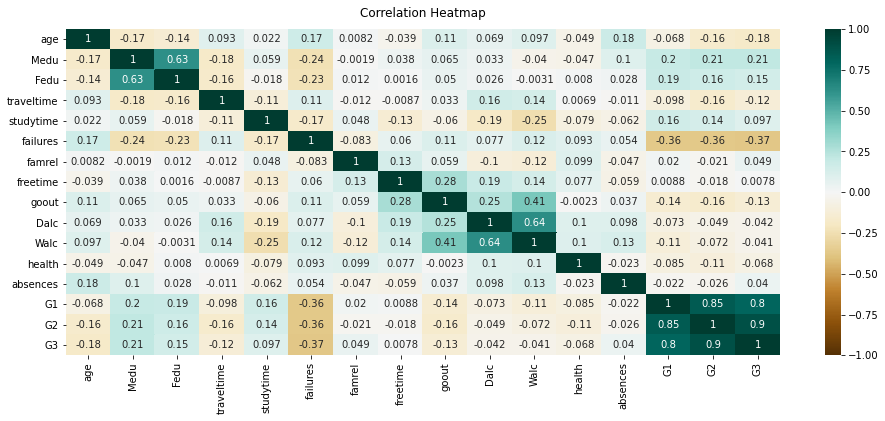

In [150]:
# f = plt.figure(figsize=(15, 15))
# plt.matshow(df_mat_new.corr(), fignum=f.number)
# plt.xticks(range(df_mat_new.select_dtypes(['number']).shape[1]), df_mat_new.select_dtypes(['number']).columns, fontsize=14, rotation=75)
# plt.yticks(range(df_mat_new.select_dtypes(['number']).shape[1]), df_mat_new.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_mat_new.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Correlation - Portuguese

Text(0.5, 1.0, 'Correlation Heatmap')

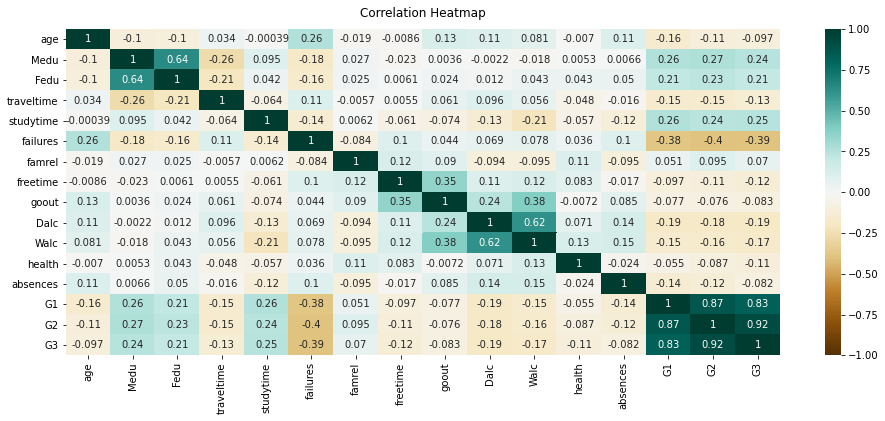

In [149]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_por_new.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Plotting categorical values - Maths

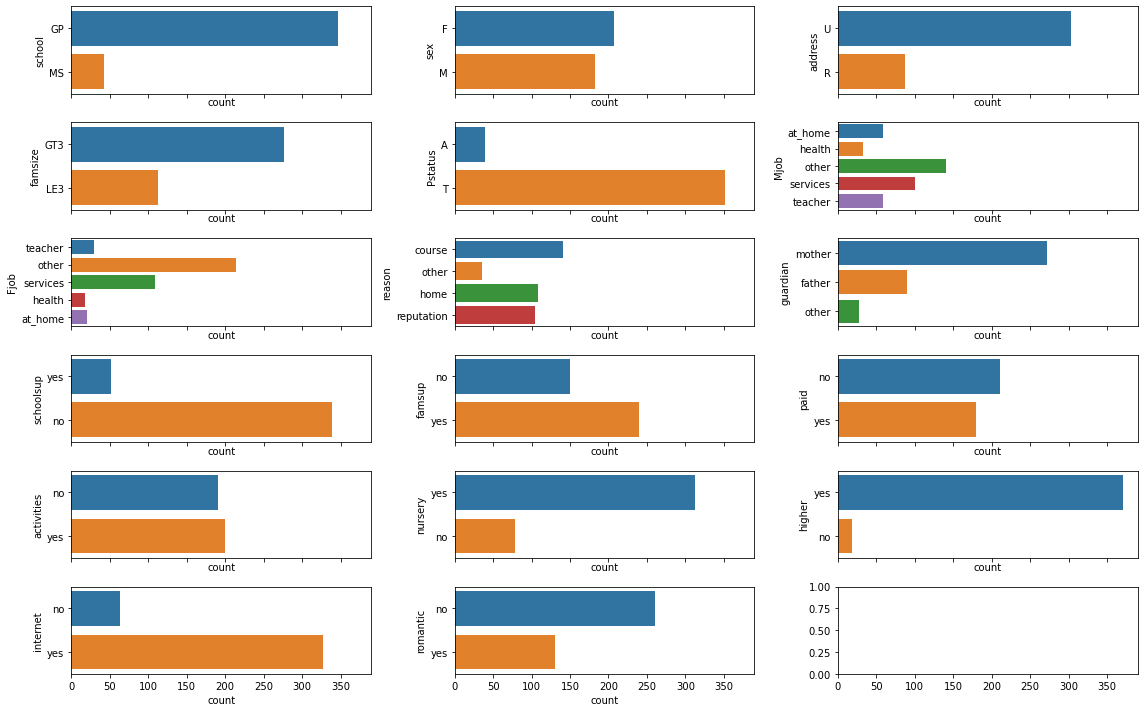

In [163]:
fig, axes =plt.subplots(6,3, figsize=(16,10), sharex=True)
axes = axes.flatten()
object_bol = df_mat_new.dtypes == 'object'
for ax, catplot in zip(axes, df_mat_new.dtypes[object_bol].index):
    sns.countplot(y=catplot, data=df_mat_new, ax=ax)

plt.tight_layout()  
plt.show()

## Plotting categorical values - Portuguese

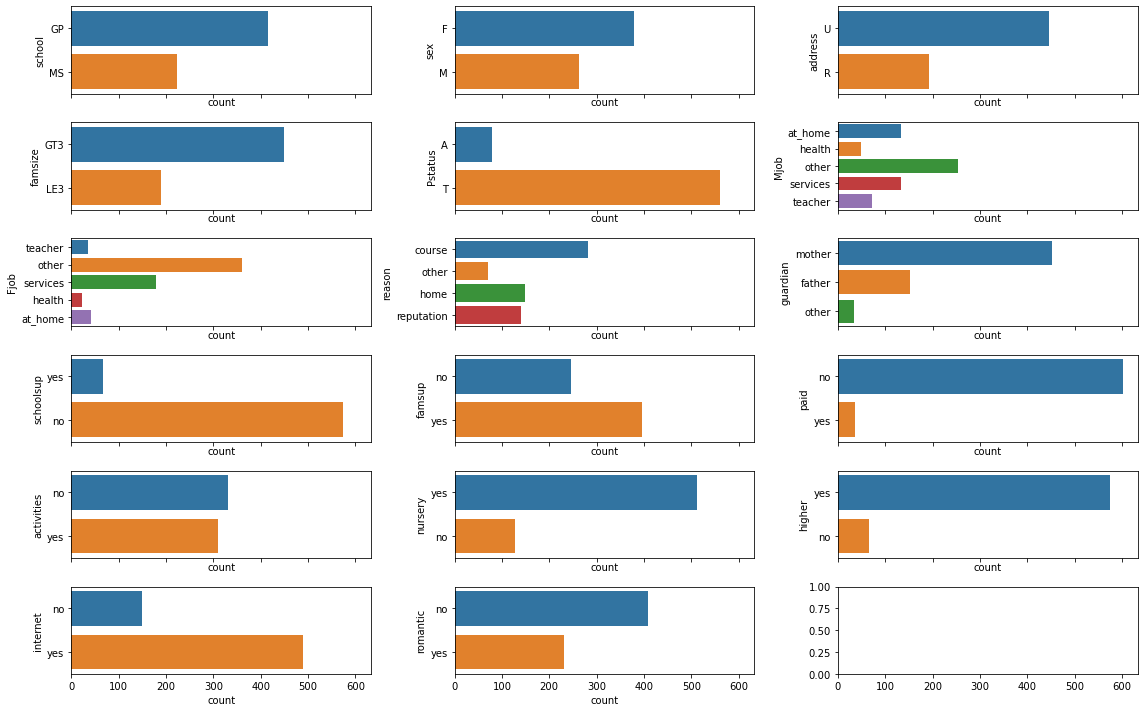

In [164]:
fig, axes =plt.subplots(6,3, figsize=(16,10), sharex=True)
axes = axes.flatten()
object_bol = df_por_new.dtypes == 'object'
for ax, catplot in zip(axes, df_por_new.dtypes[object_bol].index):
    sns.countplot(y=catplot, data=df_por_new, ax=ax)
a
plt.tight_layout()  
plt.show()